# Simulación y procesos estocásticos | Caso DISTRIMAX
## Análisis de variables de referencia
------
Aboulafia, Barquet, Lombardo, Vazquez

In [157]:
import pandas as pd

In [ ]:
simu1 = pd.read_csv('sim_results_h1.csv')
simu2 = pd.read_csv('sim_results_betas.csv') 

In [159]:
print(f"El simu1 tiene {len(simu1)} filas y {len(simu1.columns)} columnas")
print(f"El simu2 tiene {len(simu2)} filas y {len(simu2.columns)} columnas")

El simu1 tiene 600 filas y 14 columnas
El simu2 tiene 2400 filas y 16 columnas


# Análisis de heurística 1

## Cantidad de semiacoplados por planta

In [160]:
df_planta = simu1[simu1['entity'] == 'plant']

In [ ]:
df_planta_mean = df_planta.groupby('plant')['delivered'].mean().reset_index()
df_planta_std = df_planta.groupby('plant')['delivered'].std().reset_index

In [162]:
df_planta_mean

,plant,delivered
0,1,29.94
1,2,25.07
2,3,22.72


In [ ]:
df_planta_std = df_planta.groupby('plant')['delivered'].std().reset_index()

print(f"Simu1 - Para la planta 1, la media es: {df_planta_mean['delivered'][0]} y la desviación estándar es: {df_planta_std['delivered'][0]}")
print(f"Simu1 - Para la planta 2, la media es: {df_planta_mean['delivered'][1]} y la desviación estándar es: {df_planta_std['delivered'][1]}")
print(f"Simu1 - Para la planta 3, la media es: {df_planta_mean['delivered'][2]} y la desviación estándar es: {df_planta_std['delivered'][2]}")

Simu1 - Para la planta 1, la media es: 29.94 y la desviación estándar es: 0.9408785921958925
Simu1 - Para la planta 2, la media es: 25.07 y la desviación estándar es: 0.497569851956243
Simu1 - Para la planta 3, la media es: 22.72 y la desviación estándar es: 0.4512608598542128


In [ ]:
import numpy as np

for i in range(3):
    plant_num = i + 1
    mean_val = df_planta_mean['delivered'][i]
    std_val = df_planta_std['delivered'][i]
    hw = 1.645 * std_val / np.sqrt(100)
    lower = round(mean_val - hw, 2)
    upper = round(mean_val + hw, 2)
    print(f"Simu1 - Planta {plant_num}: Intervalo de confianza al 90%: [{lower}, {upper}]")

Simu1 - Planta 1: Intervalo de confianza al 90%: [29.79, 30.09]
Simu1 - Planta 2: Intervalo de confianza al 90%: [24.99, 25.15]
Simu1 - Planta 3: Intervalo de confianza al 90%: [22.65, 22.79]


## Cantidad de semiacoplados entregados

In [ ]:
simu1['delivered'] = simu1['delivered'].astype(float)
simu1['iter'] = simu1['iter'].astype(int)
simu1_mean = simu1.groupby('iter').agg({'delivered': ['sum']
                                    }).reset_index()
simu1_mean.columns = ['iter', 'delivered_sum']
simu1_mean['delivered_sum'] = simu1_mean['delivered_sum']/2

In [ ]:
print(f"Simu1 - Mean Delivered: {simu1_mean.delivered_sum.mean()}, Std Dev: {simu1_mean.delivered_sum.std()}")

Simu1 - Mean Delivered: 77.73, Std Dev: 1.3015530738469363


In [ ]:
HW = 1.645 * simu1_mean['delivered_sum'].std() / np.sqrt(100)
print(f"Simu1 - 90% Confidence Interval: [{simu1_mean.delivered_sum.mean() - HW}, {simu1_mean.delivered_sum.mean() + HW}]")
 

Simu1 - 90% Confidence Interval: [77.51589451935219, 77.94410548064782]


## Minutos que esperaron por semiacoplados vacíos

In [ ]:
simu1['iter'] = simu1['iter'].astype(int)
simu1truck = simu1[simu1['entity'] == 'truck']
simu1_mean = simu1truck.groupby('iter').agg({'wait_cd': ['mean']
                                    }).reset_index()
simu1_mean.columns = ['iter', 'wait_cd_sum']

In [206]:
print(f"Simu1 - Mean Wait CD: {simu1_mean.wait_cd_sum.mean()}, Std Dev: {simu1_mean.wait_cd_sum.std()}")

Simu1 - Mean Wait CD: 9.690192526506651, Std Dev: 6.055907885997421


In [170]:
HW = 1.645 * simu1_mean['wait_cd_sum'].std() / np.sqrt(100)
print(f"Simu1 - 90% Confidence Interval: [{simu1_mean.wait_cd_sum.mean() - HW}, {simu1_mean.wait_cd_sum.mean() + HW}]")

Simu1 - 90% Confidence Interval: [8.693995679260075, 10.686389373753228]


## Minutos que esperaron por semiacoplados llenos

In [171]:
simu1_mean = simu1.groupby('iter').agg({'wait_pl': ['mean']
                                    }).reset_index()
simu1_mean.columns = ['iter', 'wait_pl_sum']

In [172]:
print(f"Simu1 - Mean Wait PL: {simu1_mean.wait_pl_sum.mean()}, Std Dev: {simu1_mean.wait_pl_sum.std()}")

Simu1 - Mean Wait PL: 0.9265506615470075, Std Dev: 0.4938245738639635


In [173]:
HW = 1.645 * simu1_mean['wait_pl_sum'].std() / np.sqrt(100)
print(f"Simu1 - 90% Confidence Interval: [{simu1_mean.wait_pl_sum.mean() - HW}, {simu1_mean.wait_pl_sum.mean() + HW}]")

Simu1 - 90% Confidence Interval: [0.8453165191463855, 1.0077848039476296]


## Utilización promedio de camiones

In [174]:
simu1_mean = simu1.groupby('iter').agg({'util_%': ['mean']
                                    }).reset_index()
simu1_mean.columns = ['iter', 'util_sum']

In [175]:
print(f"Simu1 - Mean Utilization: {simu1_mean['util_sum'].mean()}, Std Dev: {simu1_mean['util_sum'].std()}")

Simu1 - Mean Utilization: 97.78810000000001, Std Dev: 1.2549351515388754


In [176]:
HW = 1.645 * simu1_mean['util_sum'].std() / np.sqrt(100)
print(f"Simu1 - 90% Confidence Interval: [{simu1_mean.util_sum.mean() - HW}, {simu1_mean.util_sum.mean() + HW}]")

Simu1 - 90% Confidence Interval: [97.58166316757188, 97.99453683242815]


# Análisis de heurística 2

## Análisis de camiones entregados por planta por β

In [ ]:
df_planta = simu2[simu2['entity'] == 'plant']

resumen = (
    df_planta
      .groupby(["beta", "plant"])["delivered"]
      .agg(media="mean", desvio="std")
      .reset_index()
)

tabla_pivote = resumen.pivot(index="beta", columns="plant", values="media")
tabla_pivote_std = resumen.pivot(index="beta", columns="plant", values="desvio")

print("Media de trailers entregados por planta y β:")
display(tabla_pivote)

print("\nDesvío estándar por planta y β:")
display(tabla_pivote_std)

Media de trailers entregados por planta y β:


plant,1,2,3
beta,,,
0.0,28.64,25.58,23.32
0.5,28.24,25.03,24.46
1.0,27.90,25.30,24.53
2.0,27.69,25.44,24.75



Desvío estándar por planta y β:


plant,1,2,3
beta,,,
0.0,1.352289,0.741007,1.270330
0.5,1.083578,0.437047,0.539734
1.0,0.822659,0.577350,0.593823
2.0,0.630776,0.608359,0.592461


In [ ]:
for beta in df_planta['beta'].unique():
    for plant in df_planta['plant'].unique():
        media = tabla_pivote.loc[beta, plant]
        desvio = tabla_pivote_std.loc[beta, plant]
        n = df_planta[(df_planta['beta'] == beta) & (df_planta['plant'] == plant)].shape[0]
        
        if n > 0:
            HW = 1.645 * desvio / (n ** 0.5)
            print(f"Beta: {beta}, Planta: {plant} - Intervalo de confianza al 90%: [{media - HW}, {media + HW}]")

Beta: 0.0, Planta: 1 - Intervalo de confianza al 90%: [28.417548378656427, 28.862451621343574]
Beta: 0.0, Planta: 2 - Intervalo de confianza al 90%: [25.458104400109242, 25.701895599890754]
Beta: 0.0, Planta: 3 - Intervalo de confianza al 90%: [23.111030775548944, 23.528969224451057]
Beta: 0.5, Planta: 1 - Intervalo de confianza al 90%: [28.061751408976058, 28.41824859102394]
Beta: 0.5, Planta: 2 - Intervalo de confianza al 90%: [24.95810576458534, 25.10189423541466]
Beta: 0.5, Planta: 3 - Intervalo de confianza al 90%: [24.371213705102555, 24.548786294897447]
Beta: 1.0, Planta: 1 - Intervalo de confianza al 90%: [27.764672609848365, 28.035327390151632]
Beta: 1.0, Planta: 2 - Intervalo de confianza al 90%: [25.205025880718306, 25.394974119281695]
Beta: 1.0, Planta: 3 - Intervalo de confianza al 90%: [24.432316046234643, 24.62768395376536]
Beta: 2.0, Planta: 1 - Intervalo de confianza al 90%: [27.586237292490527, 27.793762707509476]
Beta: 2.0, Planta: 2 - Intervalo de confianza al 90%: 

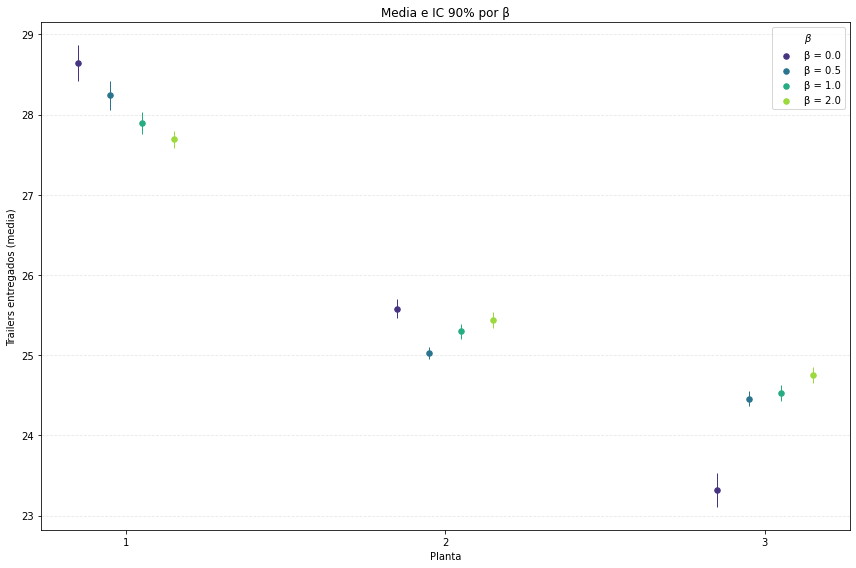

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

resumen["HW"] = 1.645 * resumen["desvio"] / np.sqrt(100)

plants = sorted(resumen["plant"].unique())
plant_pos = np.arange(len(plants))           
betas = sorted(resumen["beta"].unique())
offsets = np.linspace(-0.15, 0.15, len(betas))

palette = plt.cm.viridis(np.linspace(0.15, 0.85, len(betas)))  

for i, beta in enumerate(betas):
    sub = (resumen[resumen["beta"] == beta]
                  .sort_values("plant"))      
    x = plant_pos + offsets[i]
    y = sub["media"].values
    hw = sub["HW"].values

    ax.scatter(x, y, s=30, color=palette[i], label=f"β = {beta}", zorder=3)
    ax.vlines(x, y - hw, y + hw, color=palette[i], linewidth=1, zorder=2)

ax.set_xticks(plant_pos)
ax.set_xticklabels(plants)
ax.set_xlabel("Planta")
ax.set_ylabel("Trailers entregados (media)")
ax.set_title("Media e IC 90% por β")
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.legend(title=r"$\beta$")
plt.tight_layout()
plt.show()

## Cantidad de semiacoplados entregados totales por β

In [ ]:
totales_run = (
    df_planta
      .groupby(["beta", "iter"])["delivered"]
      .sum()
      .reset_index(name="delivered_total")
)

stats_totales = (
    totales_run
      .groupby("beta")["delivered_total"]
      .agg(media="mean", desvio="std")
      .reset_index()
)

print(stats_totales)

   beta  media    desvio
0   0.0  77.54  1.417210
1   0.5  77.73  1.462356
2   1.0  77.73  1.441485
3   2.0  77.88  1.289272


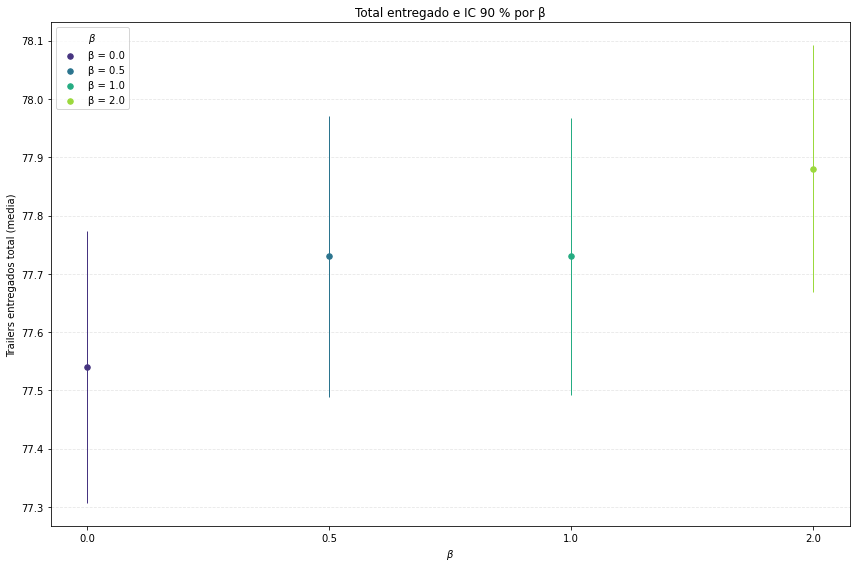

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_por_beta = (
    totales_run
      .groupby("beta")["delivered_total"]
      .count()
      .reset_index(name="n")
)

stats_totales = stats_totales.merge(n_por_beta, on="beta")

stats_totales["HW"] = 1.645 * stats_totales["desvio"] / np.sqrt(100)

fig, ax = plt.subplots()

betas = sorted(stats_totales["beta"])
x_pos = np.arange(len(betas))                             
palette = plt.cm.viridis(np.linspace(0.15, 0.85, len(betas)))

for i, beta in enumerate(betas):
    media = stats_totales.loc[stats_totales["beta"] == beta, "media"].values[0]
    hw    = stats_totales.loc[stats_totales["beta"] == beta, "HW"].values[0]

    ax.scatter(x_pos[i], media, s=30, color=palette[i], label=f"β = {beta}", zorder=3)
    ax.vlines(x_pos[i], media - hw, media + hw, color=palette[i], linewidth=1, zorder=2)

fig.set_size_inches(12, 8)  
ax.set_xticks(x_pos)
ax.set_xticklabels(betas)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel("Trailers entregados total (media)")
ax.set_title("Total entregado e IC 90 % por β")
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.legend(title=r"$\beta$", loc='upper left')
plt.tight_layout()
plt.show()

## Minutos que esperaron por semiacoplados vacíos y llenos

In [187]:
df_truck = simu2[simu2['entity'] == 'truck']

In [ ]:
promedio_run = (
    df_truck
      .groupby(["beta", "iter"])[["wait_pl", "wait_cd"]]
      .mean()                      
      .reset_index()
)

stats_wait = (
    promedio_run
      .groupby("beta")[["wait_pl", "wait_cd"]]
      .agg({'wait_pl': ['mean', 'std'], 'wait_cd': ['mean', 'std']})
      .round(2)                    
)

print("Tiempo promedio de espera por camión (min) — media ± desvío")
print(stats_wait)

Tiempo promedio de espera por camión (min) — media ± desvío
     wait_pl       wait_cd      
        mean   std    mean   std
beta                            
0.0     6.99  4.82    7.96  6.44
0.5     4.00  2.68    9.28  6.33
1.0     3.28  2.40    9.24  6.27
2.0     2.34  2.13    8.86  5.73


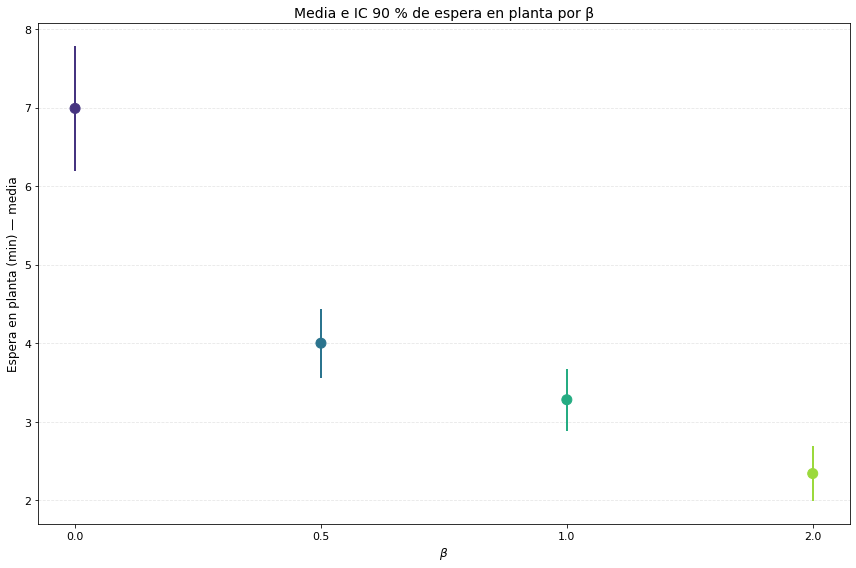

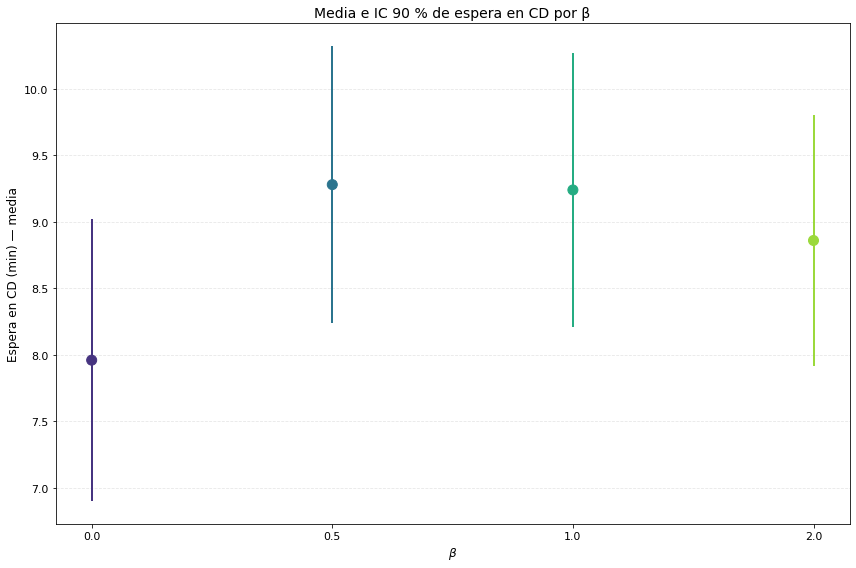

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_runs = (
    promedio_run
      .groupby("beta")
      .size()
      .reset_index(name="n")
)

stats_wait = stats_wait.copy()            
stats_wait.columns = ['wait_pl_mean', 'wait_pl_std',
                      'wait_cd_mean', 'wait_cd_std']
stats_wait = stats_wait.reset_index().merge(n_runs, on="beta")

for col in ['wait_pl', 'wait_cd']:
    stats_wait[f'{col}_HW'] = (
        1.645 * stats_wait[f'{col}_std'] / np.sqrt(stats_wait['n'])
    )

palette = plt.cm.viridis(np.linspace(0.15, 0.85, len(stats_wait)))
x_pos   = np.arange(len(stats_wait))       

def plot_wait(metric, ylabel, title):
    fig, ax = plt.subplots(figsize=(12, 8))  

    means = stats_wait[f'{metric}_mean']
    hws   = stats_wait[f'{metric}_HW']

    ax.scatter(x_pos, means, s=100, color=palette, zorder=3)
    ax.vlines(x_pos, means - hws, means + hws, color=palette, linewidth=2, zorder=2)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(stats_wait['beta'])
    ax.set_xlabel(r"$\beta$", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(axis="y", linestyle="--", alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=11)
    plt.tight_layout()
    plt.show()

# --- 4) Graficar ------------------------------------------------------
plot_wait('wait_pl', "Espera en planta (min) — media", "Media e IC 90 % de espera en planta por β")
plot_wait('wait_cd', "Espera en CD (min) — media",     "Media e IC 90 % de espera en CD por β")

## Utilización de camiones

In [ ]:
util_run = (
    df_truck
      .groupby(["beta", "iter"])["util_%"]
      .mean()              
      .reset_index(name="util_mean_run")
)

stats_util = (
    util_run
      .groupby("beta")["util_mean_run"]
      .agg(media="mean", desvio="std")
      .reset_index()
)

print(stats_util)

   beta      media    desvio
0   0.0  96.884633  1.370205
1   0.5  97.233100  1.443922
2   1.0  97.392167  1.487550
3   2.0  97.668233  1.391985


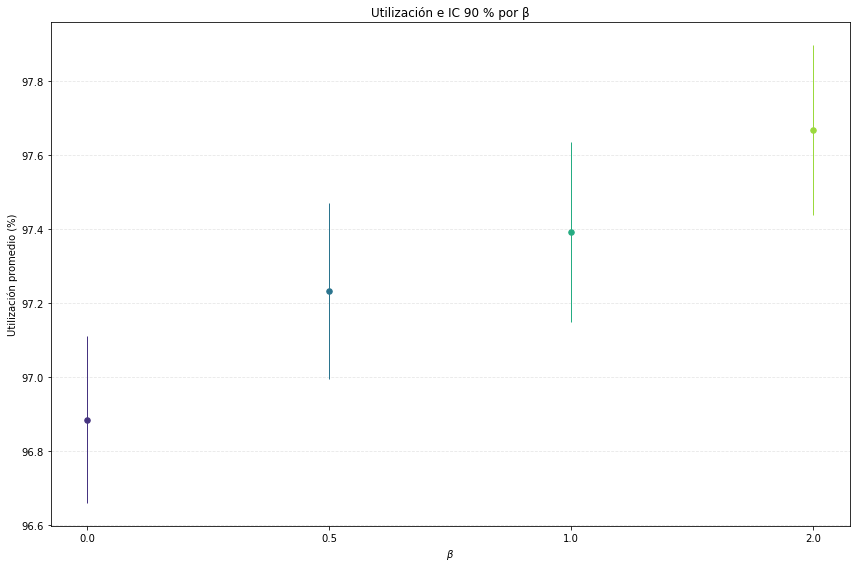

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_util = (
    util_run
      .groupby("beta")
      .size()
      .reset_index(name="n")
)

stats_util = stats_util.merge(n_util, on="beta")
stats_util["HW"] = 1.645 * stats_util["desvio"] / np.sqrt(stats_util["n"])

fig, ax = plt.subplots()

betas  = sorted(stats_util["beta"])
x_pos  = np.arange(len(betas))
palette = plt.cm.viridis(np.linspace(0.15, 0.85, len(betas)))

for i, beta in enumerate(betas):
    media = stats_util.loc[stats_util["beta"] == beta, "media"].values[0]
    hw    = stats_util.loc[stats_util["beta"] == beta, "HW"].values[0]

    ax.scatter(x_pos[i], media, s=30, color=palette[i], zorder=3)
    ax.vlines(x_pos[i], media - hw, media + hw, color=palette[i],
              linewidth=1, zorder=2)

fig.set_size_inches(12, 8)  
ax.set_xticks(x_pos)
ax.set_xticklabels(betas)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel("Utilización promedio (%)")
ax.set_title("Utilización e IC 90 % por β")
ax.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de escenario 3: Heurística 2 con 4 camiones

In [210]:
trucks4 = pd.read_csv('sim_results_4trucks.csv')
trucks4

,entity,iter,beta,truck,plant,trips,delivered,selected,wait_pl,wait_cd,no_empty,no_full,util_%
0,truck,0,0.0,1.0,1,15.0,30,30,119.43,0.00,0.0,11.0,75.12
1,truck,0,0.0,2.0,2,16.0,22,21,86.57,0.00,0.0,8.0,81.96
2,truck,0,0.0,3.0,3,16.0,11,12,84.16,1.81,3.0,8.0,82.09
3,truck,0,0.0,4.0,1,16.0,30,30,72.12,0.00,0.0,6.0,84.98
4,plant,0,0.0,NaN,1,NaN,30,30,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,truck,99,2.0,3.0,3,16.0,20,21,57.69,3.45,2.0,4.0,87.26
2796,truck,99,2.0,4.0,1,16.0,22,22,58.25,0.00,0.0,5.0,87.86
2797,plant,99,2.0,NaN,1,NaN,22,22,NaN,NaN,NaN,NaN,NaN
2798,plant,99,2.0,NaN,2,NaN,21,21,NaN,NaN,NaN,NaN,NaN


In [211]:
beta2 = trucks4[trucks4['beta'] == 2]
beta2_truck =  beta2[beta2['entity'] == 'truck']
beta2_planta = beta2[beta2['entity'] == 'plant']

In [216]:
beta2_truck

,entity,iter,beta,truck,plant,trips,delivered,selected,wait_pl,wait_cd,no_empty,no_full,util_%
2100,truck,0,2.0,1.0,1,16.0,22,23,65.60,0.00,0.0,6.0,86.33
2101,truck,0,2.0,2.0,2,16.0,21,21,100.06,0.00,0.0,9.0,79.15
2102,truck,0,2.0,3.0,3,16.0,20,21,61.55,1.81,3.0,4.0,86.80
2103,truck,0,2.0,4.0,1,17.0,22,23,55.57,0.00,0.0,6.0,88.42
2107,truck,1,2.0,1.0,1,16.0,22,22,100.06,0.00,0.0,8.0,79.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,truck,98,2.0,4.0,1,16.0,23,23,79.55,0.00,0.0,8.0,83.43
2793,truck,99,2.0,1.0,1,16.0,22,22,73.52,0.00,0.0,6.0,84.68
2794,truck,99,2.0,2.0,2,16.0,21,21,78.94,0.00,0.0,6.0,83.56
2795,truck,99,2.0,3.0,3,16.0,20,21,57.69,3.45,2.0,4.0,87.26


## Cantidad de semiacoplados entregados totales

In [194]:
simu2_mean = beta2_truck.groupby('iter').agg({'delivered': ['sum']
                                    }).reset_index()
simu2_mean.columns = ['iter', 'delivered_sum']

In [195]:
print(f"Beta2 - 4 camiones - Mean Delivered: {simu2_mean.delivered_sum.mean()}, Std Dev: {simu2_mean.delivered_sum.std()}")

Beta2 - 4 camiones - Mean Delivered: 85.72, Std Dev: 1.287704087972783


In [ ]:
HW = 1.645 * simu2_mean['delivered_sum'].std() / np.sqrt(100)
print(f"Beta2 - 4 camiones - 90% Confidence Interval: [{simu2_mean.delivered_sum.mean() - HW}, {simu2_mean.delivered_sum.mean() + HW}]")

Beta2 - 4 camiones - 90% Confidence Interval: [85.50817267752848, 85.93182732247152]


## Minutos que esperaron por semiacoplados vacíos y llenos

In [214]:
simu2_mean = beta2_truck.groupby('iter').agg({'wait_cd': ['sum']
                                    }).reset_index()
simu2_mean.columns = ['iter', 'wait_cd_sum']

In [215]:
print(f"Beta2 - 4 camiones - Mean Wait CD: {simu2_mean.wait_cd_sum.mean()}, Std Dev: {simu2_mean.wait_cd_sum.std()}")

Beta2 - 4 camiones - Mean Wait CD: 3.3237, Std Dev: 1.207580982080634


In [ ]:
HW = 1.645 * simu2_mean['wait_cd_sum'].std() / np.sqrt(100)
print(f"Beta2 - 4 camiones - 90% Confidence Interval: [{simu2_mean.wait_cd_sum.mean() - HW}, {simu2_mean.wait_cd_sum.mean() + HW}]")

Beta2 - 4 camiones - 90% Confidence Interval: [0.7812632321119339, 0.8805867678880661]


In [200]:
simu2_mean = beta2_truck.groupby('iter').agg({'wait_pl': ['mean']
                                    }).reset_index()
simu2_mean.columns = ['iter', 'wait_pl_sum']

In [201]:
HW = 1.645 * simu2_mean['wait_pl_sum'].std() / np.sqrt(100)
print(f"Beta2 - 4 camiones - Mean Wait PL: {simu2_mean.wait_pl_sum.mean()}, Std Dev: {simu2_mean.wait_pl_sum.std()}")
print(f"Beta2 - 4 camiones - 90% Confidence Interval: [{simu2_mean.wait_pl_sum.mean() - HW}, {simu2_mean.wait_pl_sum.mean() + HW}]")

Beta2 - 4 camiones - Mean Wait PL: 71.04742499999999, Std Dev: 4.756403796740928
Beta2 - 4 camiones - 90% Confidence Interval: [70.2649965754361, 71.82985342456388]


## Utilización promedio de camiones

In [202]:
simu2_mean = beta2_truck.groupby('iter').agg({'util_%': ['mean']
                                    }).reset_index()
simu2_mean.columns = ['iter', 'util_sum']

In [203]:
print(f"Beta2 - 4 camiones - Mean Util % : {simu2_mean['util_sum'].mean()}, Std Dev: {simu2_mean['util_sum'].std()}")

Beta2 - 4 camiones - Mean Util % : 85.02532500000001, Std Dev: 0.9822811303622077


In [204]:
HW = 1.645 * simu2_mean['util_sum'].std() / np.sqrt(100)
print(f"Beta2 - 4 camiones - 90% Confidence Interval: [{simu2_mean['util_sum'].mean() - HW}, {simu2_mean['util_sum'].mean() + HW}]")

Beta2 - 4 camiones - 90% Confidence Interval: [84.86373975405543, 85.18691024594459]
